<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

# Чтение файла

df = pd.read_csv("/content/OnlineRetail.csv", error_bad_lines=False, encoding='latin1')
#Пришлось покапаться в интернете, дабы обойти ошибку(в n строке ожидалось увидеть 8 полей, а нашлось 13). Кодом после названия  датафрейма, мы сделали так, что таблица будет создана на основе первой строки и все, что не подойдет под ее формат будет опущено.
#Так же я использовала кодировку latin1 для чтения этого файла, поскольку в этом файле, возможно, есть некоторые специальные символы, опять же воспользовалась помощью паутины, чтобы вывести хоть что-то, и это помогло :)
df
#Так же, при каждом запуске, у меня появляется разное кол-во строк. В данном примере почти максимальное кол-во.

<ipython-input-97-666a43d653e6>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/OnlineRetail.csv", error_bad_lines=False, encoding='latin1')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [58]:
df = df.drop(columns = ['CustomerID'])
df
#Тк в CustomerID у нас больше всего пропусков, мы удалим этот столбец

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


<Axes: >

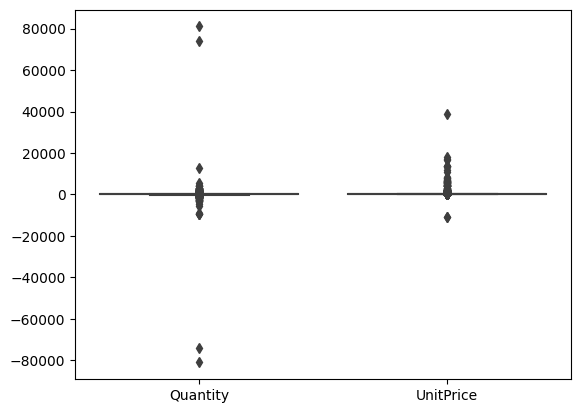

In [59]:
sns.boxplot(df)
#У нас есть выбросы, так что их нужно удалить

In [60]:
import math
from statistics import median, mean
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

class Outline:
  def __init__(self, df):
    self.df = df.copy()

  def shovene(self, column):
    n = self.df[column].count()
    cnt=0
    result = []
    for elem in self.df[column]:
        mean = self.df[column].mean()
        std = self.df[column].std()
        if math.erfc((abs(elem - mean)) / std) < 1 / (2 * n):
            n -= 1
            result.append(cnt)
        cnt+=1
    if len(result)==1:
      self.df = self.df.drop(index = result[0])
    elif len(result)>1:
      self.df = self.df.drop(index = result)
    return self.df

  def quantile(self, column):
      q1 = self.df[column].quantile(0.25)
      q3 = self.df[column].quantile(0.75)
      minimum = q1-1.5*(q3-q1)
      maximum = q3+1.5*(q3-q1)
      return self.df[(self.df[column] >= minimum) & (self.df[column] <= maximum)]

  def delete_outline_by_mean(self, column):
    mean_data = mean(self.df[column])
    maximum = mean_data * 2
    result = []
    cnt = 0
    for item in self.df[column]:
      if abs(item - mean_data) > maximum:
        result.append(cnt)
        cnt+=1
    if len(result)==1:
      self.df = self.df.drop(index = result[0])
    elif len(result)>1:
      self.df = self.df.drop(index = result)
    return self.df

  def mean_std(self,column):
      result = []
      cnt =0
      print(self.df[column].mean(),self.df[column].std())
      for elem in self.df[column]:
        mean = self.df[column].mean()
        std = self.df[column].std()
        if abs((elem-mean)/std) >3 :
          result.append(cnt)
        cnt+=1
      if len(result)==1:
        self.df = self.df.drop(index = result[0])
      elif len(result)>1:
        self.df = self.df.drop(index = result)
      return self.df

  def two_var(self):
      iso_forest = IsolationForest(n_estimators=10)
      iso_forest.fit(self.df)
      return self.df[iso_forest.predict(self.df)!=-1]

In [61]:
df_class = Outline(df)
df_class = df_class.quantile('Quantity')

In [62]:
df_class_2 = Outline(df_class)
df_class_2 = df_class_2.quantile('UnitPrice')

In [63]:
df_class_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


<Axes: >

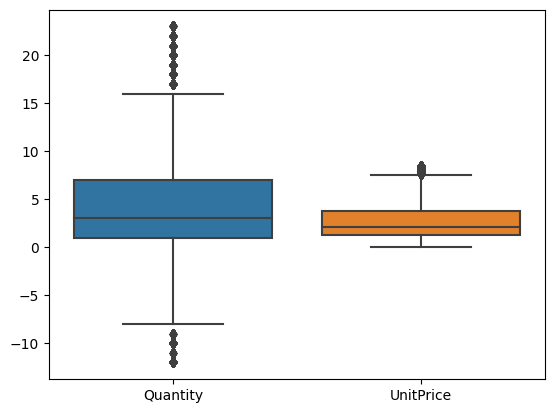

In [64]:
sns.boxplot(df_class_2)
#После удаления аномалий, через квантили все равно остались аномалии, их можно удалить, но я решила их оставить, тк подумала, что одного удаления будет достаточно.

In [65]:
df_class_2 = df_class_2.dropna()
df_class_2
#Мы удалили строки, в которых были пропуски

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


In [66]:
df_class_2['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Spain', 'Cyprus', 'Austria', 'Sweden', 'Netherlands', 'Israel',
       'Finland', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [67]:
df_cluster = df_class_2.copy()
df_cluster = df_cluster.drop(columns = ['InvoiceDate', 'Description', 'StockCode', 'InvoiceNo', 'Country'])

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>]], dtype=object)

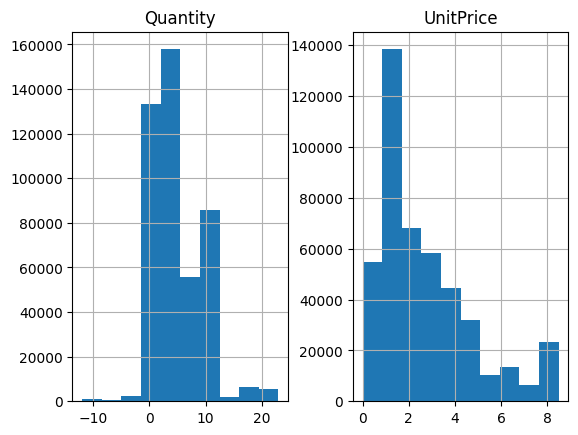

In [68]:
df_cluster.hist()

Видно ненормальное распределение, поэтому я использовала мин_макс скалирование

In [77]:
df_cluster = df_cluster.iloc[:10000]
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_cluster[['Quantity','UnitPrice']])
df_cluster[['Quantity','UnitPrice	']] = min_max_scal
df_cluster.UnitPrice.unique()

array([2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 2.1 , 3.75, 1.65, 4.95, 5.95,
       7.95, 0.85, 2.95, 1.06, 6.95, 1.95, 1.25, 1.69, 1.45, 3.95, 6.75,
       4.65, 6.45, 8.5 , 0.42, 5.45, 6.35, 3.45, 3.35, 0.55, 0.95, 0.65,
       0.29, 3.25, 1.49, 2.25, 1.55, 2.51, 1.66, 0.43, 7.62, 4.21, 2.98,
       5.91, 3.36, 1.28, 8.47, 0.81, 5.06, 6.77, 0.84, 3.81, 4.24, 1.26,
       5.09, 2.96, 2.11, 1.05, 5.49, 2.82, 1.27, 3.19, 0.99, 2.13, 5.51,
       8.49, 8.07, 7.22, 2.54, 5.94, 0.19, 0.75, 7.25, 0.12, 5.74, 0.21,
       1.84, 6.37, 0.  , 3.83, 7.5 , 0.14, 1.  , 3.49, 5.55, 7.64])

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

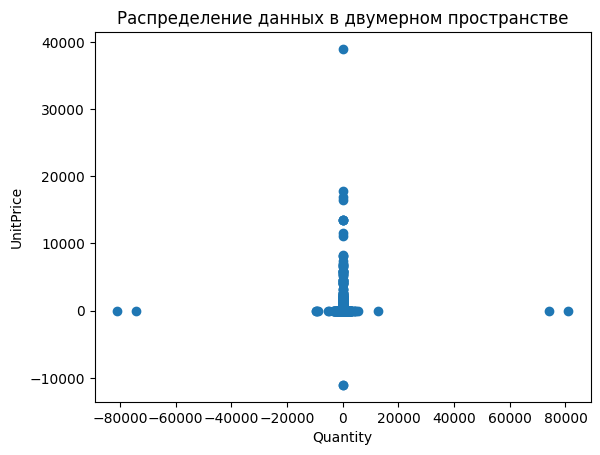

In [78]:
plt.scatter(df["Quantity"], df["UnitPrice"])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Распределение данных в двумерном пространстве')

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

10000
Оптимальное число кластеров Calinski Harabasz Score 10, с баллом 91058.7096910152
Оптимальное число кластеров Silhouette Score 2, с баллом 0.6380069033484275
Оптимальное число кластеров Davies Bouldin Score 10, с баллом 0.49527981641434754


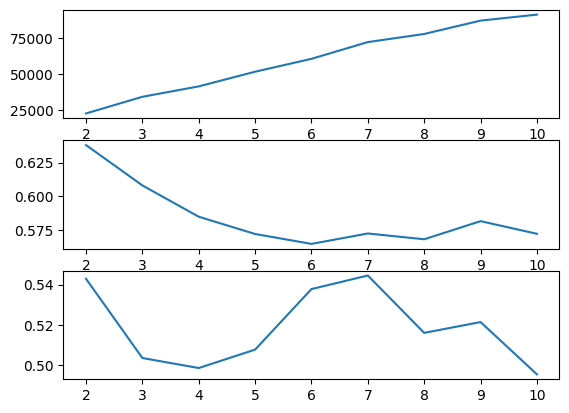

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(df_cluster)
  score_1.append(calinski_harabasz_score(df_cluster,kmeans.labels_))
  score_2.append(silhouette_score(df_cluster,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_cluster,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)

#Мы берем 10 кластеров, тк 2 из 3 метрик показали, что 10 кластеров по критериям будут лучшими


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

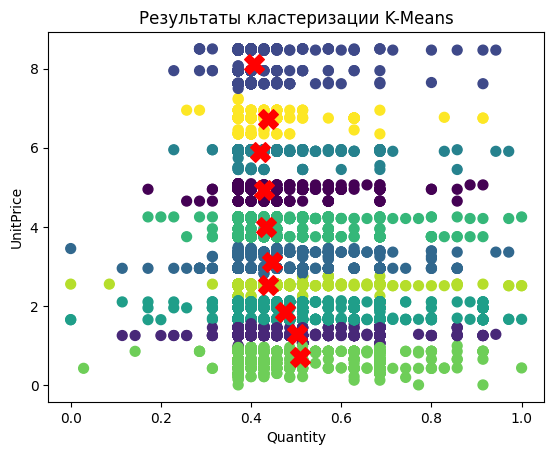

In [81]:
kmeans = KMeans(n_clusters= 10,n_init = 10,random_state = 42)
kmeans.fit(df_cluster)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_cluster['Quantity'], df_cluster['UnitPrice'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [75]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

#Я подождала минут 20 и поняла, что это на 10 часов, поэтому данные eps буду брать как у вас в примере

KeyboardInterrupt: ignored

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

[0]


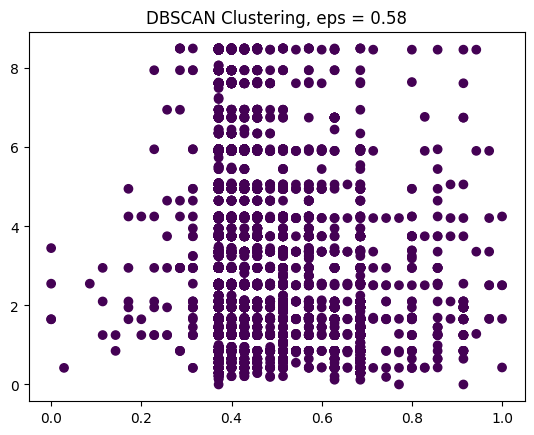

[0]


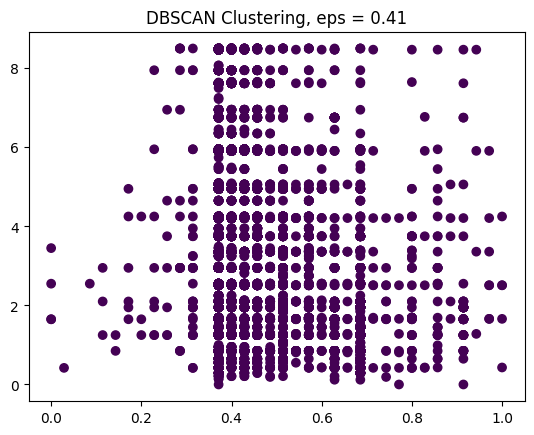

[0]


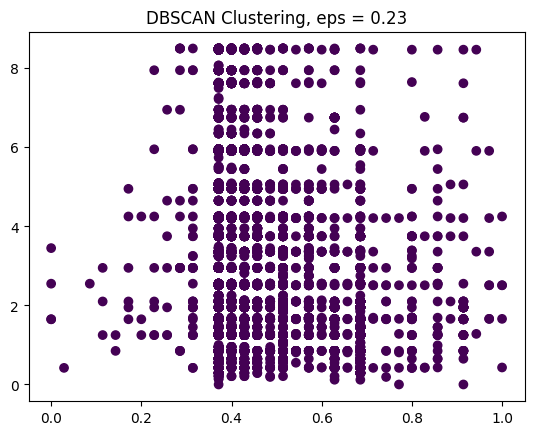

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


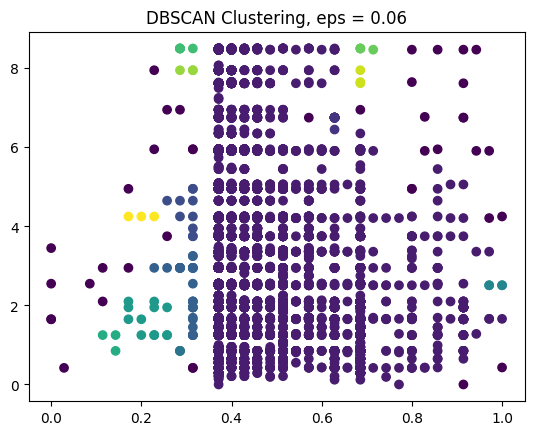

In [92]:
for eps in [0.58,0.41,0.23,0.055]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(min_max_scal)
  labels_db = dbscan.labels_
  print(np.unique(labels_db))
  # Визуализация результатов, темные точки - выбросы
  plt.scatter(df_cluster['Quantity'], df_cluster['UnitPrice'], c=labels_db, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [93]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [94]:
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k,linkage='average')

  clusters = cluster_model.fit(min_max_scal)

  score_2.append(silhouette_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")

Оптимальное число кластеров Silhouette Score 2, с баллом 0.1974878380665968


По метрике оптимальное число кластеров 2, но коэффициент меньше 0.5, поэтому данная метрика не имеет смысла, берем 4 кластера, как в примере.

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

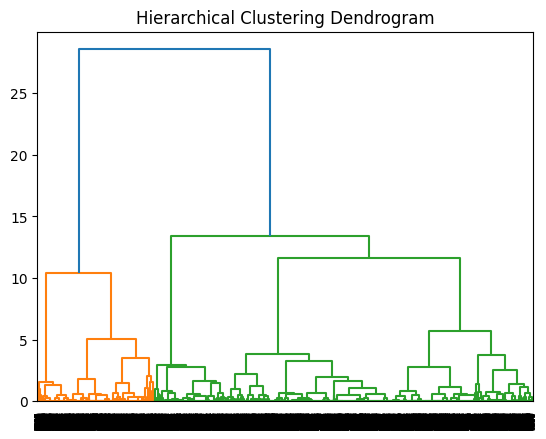

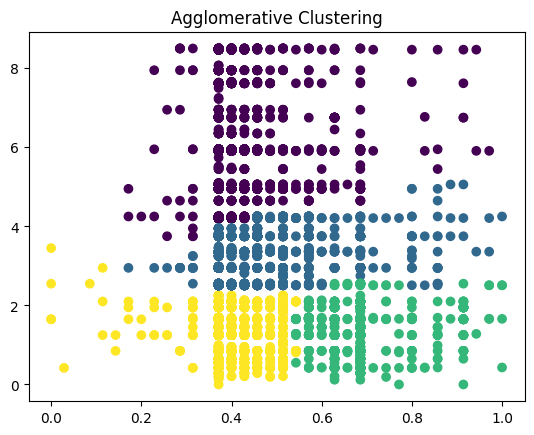

In [96]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(min_max_scal)
linkage_matrix = hierarchy.linkage(min_max_scal, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Визуализация результатов кластеризации
plt.scatter(df_cluster['Quantity'], df_cluster['UnitPrice'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех
Тк я выбрала 2 параметра, то мне нет смысла делать следующую часть задания, потому что на графиках выше видна связь, как кластеры распределялись